In [1]:
import sklearn as skl
import dataproc.operations as dop
from dataproc.operations.hitp import load_image 
from dataproc.operations.hitp import fit_peak
import glob
from dataproc.operations.hitp import bayesian_block_finder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.cluster
import glob
import dataproc
import os
import sys
import re

In [2]:
#fit_peak?

In [3]:
#bayesian_block_finder?

# Trying out stuff in order to write the feat_extr() function

In [4]:
# Note that the peak_rem() function is not accurate because of the 4 curves add up to 1 peak thing not taken into account
import peak_removal

## Most of this was done with datapoints 173 - 177 from TiNiSn_500C

In [5]:
data1 = pd.read_csv("C:/Users/oluwa/Downloads/TiNiSn_500C_Y20190218_14x14_t60_0177_bkgdSub_1D.csv", header=None)
print(data1)

            0         1
0    1.502500  3.190278
1    1.507500  4.497155
2    1.512500  5.195218
3    1.517500  6.226624
4    1.522500  7.955827
..        ...       ...
795  5.477501  3.607538
796  5.482501  3.509936
797  5.487501  3.280561
798  5.492501  2.791820
799  5.497501  2.036510

[800 rows x 2 columns]


In [6]:
data1 = pd.read_csv("C:/Users/oluwa/Downloads/TiNiSn_500C_Y20190218_14x14_t60_0177_bkgdSub_1D.csv", header=None)
print(data1)

            0         1
0    1.502500  3.190278
1    1.507500  4.497155
2    1.512500  5.195218
3    1.517500  6.226624
4    1.522500  7.955827
..        ...       ...
795  5.477501  3.607538
796  5.482501  3.509936
797  5.487501  3.280561
798  5.492501  2.791820
799  5.497501  2.036510

[800 rows x 2 columns]


In [7]:
data1

,0,1
0,1.502500,3.190278
1,1.507500,4.497155
2,1.512500,5.195218
3,1.517500,6.226624
4,1.522500,7.955827
...,...,...
795,5.477501,3.607538
796,5.482501,3.509936
797,5.487501,3.280561
798,5.492501,2.791820


In [8]:
subdata1 = data1.loc[:,1]

In [9]:
data1.mean(axis=0)

0     3.500000
1    29.471614
dtype: float64

In [10]:
np.shape(data1)

(800, 2)

In [11]:
#pd.DataFrame.mean?

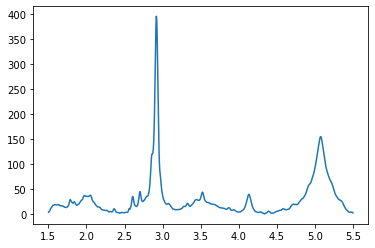

In [12]:
plt.plot(data1.loc[:,0], data1.loc[:,1])

In [13]:
data1.loc[:,1]

0      3.190278
1      4.497155
2      5.195218
3      6.226624
4      7.955827
         ...   
795    3.607538
796    3.509936
797    3.280561
798    2.791820
799    2.036510
Name: 1, Length: 800, dtype: float64

In [14]:
data1.loc

In [15]:
#This is no longer effective
#Beccause it finds all the files starting with "T" in that filepath. And right now there are so many
#At this time, the files I needed are the only ones starting with "T" in the filepath

# filepath = "C:/Users/oluwa/Downloads/[T]*.csv"
# for name in glob.glob(filepath):
#     print(name)
#     data1 = pd.read_csv(name, header=None)
#     print(data1)
#     plt.plot(data1.loc[:,0], data1.loc[:,1])
#     plt.ylabel('Intensity')
#     plt.xlabel('Angle')
#     plt.show()

In [16]:
skl.cluster

<module 'sklearn.cluster' from 'C:\\Users\\oluwa\\anaconda3\\lib\\site-packages\\sklearn\\cluster\\__init__.py'>

In [17]:
data1 = pd.read_csv("C:/Users/oluwa/Downloads\TiNiSn_500C_Y20190218_14x14_t60_0175_bkgdSub_1D.csv", names= ["angles","Intensity"])

In [18]:
print(data1)

       angles  Intensity
0    1.502500   4.854498
1    1.507500   6.642530
2    1.512500   8.407522
3    1.517500  10.046230
4    1.522500  11.307369
..        ...        ...
795  5.477501   4.564266
796  5.482501   4.194215
797  5.487501   3.680619
798  5.492501   3.230362
799  5.497501   2.736939

[800 rows x 2 columns]


In [19]:
#These functions from Robert's github codes help to extract the curve parameters for all the "determined peaks" 
#for each XRD pattern/datapoint

import dataproc.operations as dop
from dataproc.operations.hitp import load_image 
from dataproc.operations.hitp import fit_peak
from dataproc.operations.hitp import bayesian_block_finder

In [20]:
#fit_peak?

In [21]:
#bayesian_block_finder?

In [22]:
#data1?

In [23]:
data2 = data1.to_numpy()

In [24]:
#data2?

In [25]:
data1.head()

,angles,Intensity
0,1.5025,4.854498
1,1.5075,6.642530
2,1.5125,8.407522
3,1.5175,10.046230
4,1.5225,11.307369


In [26]:
subdata1 = data1["angles"].values

In [27]:
subdata1 = data2[:,0]

In [28]:
len(subdata1)

800

In [29]:
np.size(subdata1)

800

In [30]:
np.shape(subdata1)

(800,)

In [31]:
#bayesian_block_finder?

In [32]:
# bayesian_block_finder returns the regions (x-axis regions) where there exist
#peaks(this is defined by some threshold in Robert's code)

blocks1 = bayesian_block_finder(data2[:,0],data2[:,1])
blocks1 = bayesian_block_finder(data1["angles"].values, data1["Intensity"].values)

In [33]:
#blocks1?

In [34]:
blocks1 = blocks1.astype(int)

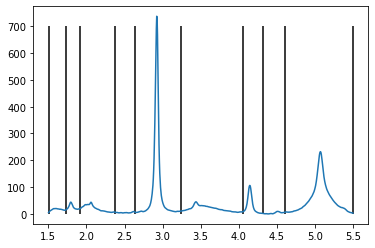

In [35]:
fig, ax = plt.subplots()
ax.plot(data2[:,0], data2[:,1])
ax.vlines(data1['angles'].loc[blocks1], 0, 700)


In [36]:
data1['angles'].loc[blocks1]

0      1.502500
46     1.732500
83     1.917500
175    2.377500
226    2.632500
347    3.237500
511    4.057500
563    4.317500
620    4.602501
799    5.497501
Name: angles, dtype: float64

In [37]:
data2[blocks1,0]

array([1.50250007, 1.73250011, 1.91750013, 2.3775002 , 2.63250023,
       3.23750032, 4.05750044, 4.31750047, 4.60250052, 5.49750064])

In [38]:
np.shape(data2)

(800, 2)

In [39]:
subdata2 = data1["Intensity"].values

In [40]:
subdata2 = data2[:,1]

In [65]:
fit_peak?

In [42]:
# Pull data from file and find the regions within the XRD pattern with peaks using the bayesian_block_finder function

data1 = pd.read_csv("C:/Users/oluwa/Downloads\TiNiSn_500C_Y20190218_14x14_t60_0175_bkgdSub_1D.csv", names= ["angles","Intensity"])
blocks1 = bayesian_block_finder(data1["angles"].values, data1["Intensity"].values)
blocks1 = blocks1.astype(int)
subdata1 = data1["angles"].values
subdata2 = data1["Intensity"].values

In [43]:
#def feat_extr():
BigParams = {}
ii = 0
for nn in range(175,176):
        if nn > 99:
            nnn = "0" + str(nn)
        elif nn > 9:
            nnn = "00" + str(nn)
        else: 
            nnn = "000" + str(nn)
            
        
   
        # Pull data from file
        filename = "C:/Users/oluwa/Downloads\TiNiSn_500C_Y20190218_14x14_t60_" + nnn + "_bkgdSub_1D.csv"
        data1 = pd.read_csv(filename, names= ["angles","Intensity"])
        blocks1 = bayesian_block_finder(data1["angles"].values, data1["Intensity"].values)
        blocks1 = blocks1.astype(int)
        subdata1 = data1["angles"].values
        subdata2 = data1["Intensity"].values

        # Get peaks boundaries
        output = []
        for i in range(len(blocks1)-1):
            output.append(fit_peak(subdata1[blocks1[i]:blocks1[i+1]],subdata2[blocks1[i]:blocks1[i+1]],peakShape="Voigt"))

        # Get Peak Parameters and store as a csv file                  
        fullp = []
        for II in range(len(output)):

            out1,out2 = output[II]

            fullparams=[]
            fullparams1 =[]
            for name, param in out1.items():
                params = []
                for pname,subparam in param.items():
                    #print(name, pname, subparam)
                    params.append(subparam)
                fullparams.append(params)

            for name1, param1 in out2.items():
                params1 = []
                for pname1,subparam1 in param1.items():
                        #print(name1, pname1, subparam1)
                        params1.append(subparam1)
                fullparams1.append(params1)

                

            for i in range(len(fullparams)):
                fullp.append(fullparams[i]+fullparams1[i])


print(np.shape(fullp))
BigParams[ii] = fullp
ii+=1
        # np.savetxt('Params_TiNiSn_500C_' + nnn +'.csv',fullp,delimiter =',')
    #return BigParams

(36, 9)


In [44]:
pd.read_csv('TiNiSn_500C_Y20190218_14x14_t60_0175_bkgdSub_1D_extr_param.csv', names = ['x0/Q','y0','I','alpha','gamma','FWHM','area','area-err','X0'])

,x0/Q,y0,I,alpha,gamma,FWHM,area,area-err,X0
0,1.659918,0.003452,1.996841e-01,2.996731e-02,8.472254e-24,0.070568,0.199670,1.073183e-11,1.659918
1,1.738750,-2.089492,3.475774e+00,5.625001e-02,5.625001e-02,0.202358,0.842805,1.037732e-12,1.738750
2,1.576584,-4.968902,6.109925e+00,5.625001e-02,4.406265e-02,0.185246,3.045037,4.489329e-11,1.576584
3,1.738750,-4.976522,1.805598e+00,5.625001e-02,5.625001e-02,0.202358,-0.437670,5.390828e-13,1.738750
4,1.795106,-10.953411,1.864876e+00,1.592713e-02,1.364628e-02,0.054067,-0.310099,1.862917e-10,1.795106
5,1.847596,16.683967,5.149456e-01,4.499585e-02,2.325473e-02,0.132399,3.398985,1.847461e-11,1.847596
6,1.919902,3.782597,2.085336e-01,2.366059e-02,1.046510e-08,0.055716,0.755172,5.102650e-14,1.919902
7,1.756939,3.638995,2.549058e-02,1.140298e-02,3.311122e-16,0.026852,0.680362,1.565116e-11,1.756939
8,2.061912,-9.225684,3.305507e-01,1.351866e-02,2.350804e-33,0.031834,-3.867136,1.179299e-09,2.061912
9,1.981985,5.989405,5.120476e-02,8.074426e-03,2.157064e-03,0.021329,2.775743,5.278286e-09,1.981985


In [45]:
data={}
for n in range(173,176):
    data[n] = pd.read_csv('Params_TiNiSn_500C_0'+ str(n) + '.csv', names = ['x0/Q','y0','I','alpha','gamma','FWHM','area','area-err','X0'])

In [46]:
#Sort by the intensity values

subdata=data[173]
subdata = subdata.sort_values('I')
#data = data.drop([0,1,2], axis=0)
subdata

#subdata.drop(subdata.index[range(0,3)])
#subdata = subdata.sort_index()
#subdata

,x0/Q,y0,I,alpha,gamma,FWHM,area,area-err,X0
19,3.235715,-1.777132,0.011629,1.350000e-01,1.335522e-01,0.483577,-0.954482,1.059688e-14,3.235715
10,1.965281,-9.800072,0.043237,2.071962e-02,2.093715e-09,0.048791,-3.582798,5.791285e-10,1.965281
5,1.900075,78.821706,0.046846,1.110148e-02,1.251004e-04,0.026267,11.447571,1.451331e-13,1.900075
31,4.629751,-0.511934,0.055091,3.624999e-02,4.708372e-06,0.085367,-0.051813,3.771495e-13,4.629751
15,2.582208,-2.902421,0.062545,1.623690e-18,1.073554e-02,0.021471,-1.187899,6.207266e-09,2.582208
30,4.586604,-0.555884,0.119930,6.925819e-11,1.586956e-02,0.031739,0.017922,7.818231e-11,4.586604
12,2.564466,-2.536346,0.132512,3.776580e-03,4.918648e-03,0.015280,-0.960291,5.603268e-09,2.564466
29,4.622961,0.333043,0.141329,1.720861e-02,1.270658e-17,0.040523,0.117181,4.184048e-11,4.622961
14,2.263512,-3.870169,0.171765,9.504842e-02,6.283625e-14,0.223822,-1.590104,3.480714e-10,2.263512
7,1.822599,-23.591232,0.200536,1.320368e-02,7.158482e-08,0.031092,-3.220193,1.487202e-08,1.822599


In [47]:
#fit_peak function returns the 4 curve that add up to the particular peak within the range inputted to it

vv = fit_peak(subdata1[blocks1[0]:blocks1[1]],subdata2[blocks1[0]:blocks1[1]],peakShape="Voigt")

In [48]:
vv[1].keys()

dict_keys(['curve 0', 'curve 1', 'curve 2', 'curve 3'])

In [49]:
np.shape(blocks1)

(10,)

In [50]:
vv1,vv2 = vv

In [51]:
for name, param in vv1.items():
        print(name)
        for pname,subparam in param.items():
                print(subparam)

curve 0
1.659918124124546
0.003452339942267163
0.1996841421967573
0.029967312982198225
8.47225377579186e-24
curve 1
1.7387501059312365
-2.0894916041409353
3.475773506089016
0.05625000803857253
0.056250008038572545
curve 2
1.5765838861877248
-4.968902036800536
6.109924812278409
0.056250008038572545
0.04406264909663449
curve 3
1.7387501059312365
-4.97652244919456
1.8055976810611227
0.05625000803857222
0.056250008038572545


In [52]:
# feat_extr returns the curve paramaters which make up the peaks as returned by bayesian_block_finder
#and their offsets form the x and y axes (x0,y0)
#It later saves all the curve parameters for the datapoint/XRD pattern in a csv file labelled by its grid number
#This has already being written in a python script

def feat_extr():
    BigParams = {}
    
        
    path = "C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/"
    regex = """TiNiSn_500C_Y20190218_14x14_t60_(?P<num>.*?)_bkgdSub_1D.csv"""
   
    # Pull data from file
    files = os.listdir(path)
    #regex to parse grid location from file
    pattern = re.compile(regex)

    if len(files) == 0:
         print("no files in path")
         sys.exit()
    files = list(files[175:179])

    for file in files:
        match = pattern.match(file)
        if(match == None):
            continue
        num = int(match.group("num"))
        print(num)
        #if verbose:
            #print("\t:: " + str(num) + "\t| " + file)

        #data_array = np.array(pd.read_csv(path + file,header=None))
        #try:
         #   data_array[0].astype(np.float)
        #except:
         #   data_array = data_array[1:]
        #self.data[num] = data_array.astype(np.float)
        print(path+file)

        data1 = pd.read_csv(path + file, names= ["angles","Intensity"])
        blocks1 = bayesian_block_finder(data1["angles"].values, data1["Intensity"].values)
        blocks1 = blocks1.astype(int)
        subdata1 = data1["angles"].values
        subdata2 = data1["Intensity"].values

         # Get peaks boundaries
        output = []
        for i in range(len(blocks1)-1):
            output.append(fit_peak(subdata1[blocks1[i]:blocks1[i+1]],subdata2[blocks1[i]:blocks1[i+1]],peakShape="Voigt"))

        # Get Peak Parameters and store as a csv file                  
        fullp = []
        for II in range(len(output)):

            out1,out2 = output[II]

            fullparams=[]
            fullparams1 =[]
            for name, param in out1.items():
                params = []
                for pname,subparam in param.items():
                    #print(name, pname, subparam)
                    params.append(subparam)
                fullparams.append(params)

            for name1, param1 in out2.items():
                params1 = []
                for pname1,subparam1 in param1.items():
                        #print(name1, pname1, subparam1)
                        params1.append(subparam1)
                fullparams1.append(params1)

                

            for i in range(len(fullparams)):
                fullp.append(fullparams[i]+fullparams1[i])


        print(np.shape(fullp))
        BigParams[num] = fullp

        if num > 99:
            nnn = "0" + str(num)
        elif num > 9:
            nnn = "00" + str(num)
        else: 
            nnn = "000" + str(num)

        print('TiNiSn_500C_Y20190218_14x14_t60_'+ nnn +'_bkgdSub_1D_extr_param')
        np.savetxt('TiNiSn_500C_Y20190218_14x14_t60_'+ nnn +'_bkgdSub_1D_extr_param',fullp,delimiter =',')



    
    return BigParams

In [53]:
data.keys()

dict_keys([173, 174, 175])

In [54]:
#Trying out locating files from a directory on my laptop

path = "C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/"
regex = """TiNiSn_500C_Y20190218_14x14_t60_(?P<num>.*?)_bkgdSub_1D.csv"""

# Pull data from file
files = os.listdir(path)
#regex to parse grid location from file
pattern = re.compile(regex)

if len(files) == 0:
     print("no files in path")
     sys.exit()
files =[files[4:8]]

In [55]:
np.shape(data[175])

(36, 9)

In [56]:
#Trying out locating files from a directory on my laptop

path = "C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/"
regex = """TiNiSn_500C_Y20190218_14x14_t60_(?P<num>.*?)_bkgdSub_1D.csv"""

# Pull data from file
files = os.listdir(path)
#regex to parse grid location from file
pattern = re.compile(regex)

if len(files) == 0:
     print("no files in path")
     sys.exit()
        

In [57]:
files = list(files[3:8])

In [58]:
np.shape(files)

(5,)

In [59]:
files

['TiNiSn_500C_Y20190218_14x14_t60_0001_bkgdSub_1D.csv',
 'TiNiSn_500C_Y20190218_14x14_t60_0001_bkgdSub_1D.xlsx',
 'TiNiSn_500C_Y20190218_14x14_t60_0002_bkgdSub_1D.csv',
 'TiNiSn_500C_Y20190218_14x14_t60_0003_bkgdSub_1D.csv',
 'TiNiSn_500C_Y20190218_14x14_t60_0004_bkgdSub_1D.csv']

In [60]:
type(files[0])

str

In [61]:
#Trying out locating files from a directory on my laptop

path = "C:/Users/oluwa/Jupyter notebooks/"
regex = "TiNiSn_500C_Y20190218_14x14_t60_(?P<num>.*?)_bkgdSub_1D_extr_param.csv"
   
# Pull data from file
files = os.listdir(path)
#regex to parse grid location from file
pattern = re.compile(regex)

if len(files) == 0:
     print("no files in path")
     sys.exit()
filess=[]    
for file in files:
    match = pattern.match(file)
    if(match == None):
        continue
    if filess.append(match):
        num = int(match.group("num"))
        print(num)
    
    

In [62]:
filess

[<re.Match object; span=(0, 62), match='TiNiSn_500C_Y20190218_14x14_t60_0001_bkgdSub_1D_e>,
 <re.Match object; span=(0, 62), match='TiNiSn_500C_Y20190218_14x14_t60_0002_bkgdSub_1D_e>,
 <re.Match object; span=(0, 62), match='TiNiSn_500C_Y20190218_14x14_t60_0003_bkgdSub_1D_e>,
 <re.Match object; span=(0, 62), match='TiNiSn_500C_Y20190218_14x14_t60_0004_bkgdSub_1D_e>,
 <re.Match object; span=(0, 62), match='TiNiSn_500C_Y20190218_14x14_t60_0005_bkgdSub_1D_e>,
 <re.Match object; span=(0, 62), match='TiNiSn_500C_Y20190218_14x14_t60_0006_bkgdSub_1D_e>,
 <re.Match object; span=(0, 62), match='TiNiSn_500C_Y20190218_14x14_t60_0007_bkgdSub_1D_e>,
 <re.Match object; span=(0, 62), match='TiNiSn_500C_Y20190218_14x14_t60_0008_bkgdSub_1D_e>,
 <re.Match object; span=(0, 62), match='TiNiSn_500C_Y20190218_14x14_t60_0009_bkgdSub_1D_e>,
 <re.Match object; span=(0, 62), match='TiNiSn_500C_Y20190218_14x14_t60_0010_bkgdSub_1D_e>,
 <re.Match object; span=(0, 62), match='TiNiSn_500C_Y20190218_14x14_t60_0011_bkg

In [63]:
pd.sort_index?

Object `pd.sort_index` not found.
